# Proyek Analisis Data: `Bike Sharing Dataset`
- Nama : Reyhan Ezra Bimantara
- E-mail : pro.bimantara@gmail.com
- ID Dicoding : rrexzra

# Sumber Dataset
- Bike Sharing Dataset (https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view)

# Pertanyaan Bisnis
1. Bagaimana perbedaan penggunaan sepeda pada hari kerja (_working day_), hari libur (_holiday_), dan hari biasa (_weekday_)?
2. Dalam jangka waktu satu tahun, bagaimana tren penggunaan sepeda berubah antara tahun 2011 dan 2012? Apakah terdapat perbedaan signifikan dalam jumlah perjalanan, pola penggunaan, atau faktor lain yang dapat mempengaruhi keputusan bisnis terkait promosi atau alokasi sumber daya?

# Mempersiapkan Library yang Dibutuhkan
1. `NumPy` adalah library utama untuk komputasi numerik di Python. Ini menyediakan objek array multidimensi, bersama dengan berbagai fungsi yang beroperasi pada array ini, memungkinkan Anda untuk melakukan operasi matematika yang efisien dan cepat.
2. `Pandas` adalah library yang sering digunakan untuk analisis data di Python. Ini menyediakan struktur data tingkat tinggi seperti DataFrame, yang memungkinkan Anda untuk dengan mudah mengelola dan menganalisis data tabular dalam format yang mirip dengan spreadsheet.
3. `Matplotlib` adalah library visualisasi data yang kuat di Python. Ini memungkinkan Anda untuk membuat berbagai jenis plot, seperti scatter plots, line plots, histogram, dan sebagainya. Biasanya, kita menggunakan modul pyplot untuk membuat plot dan visualisasi data.
4. `Datetime` adalah modul menyediakan fungsi-fungsi untuk bekerja dengan tanggal dan waktu dalam Python. Ini memungkinkan Anda untuk membuat objek datetime, melakukan operasi aritmatika pada tanggal dan waktu, dan memformat tanggal dan waktu sesuai kebutuhan.

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Data Wrangling

## Gathering Data
Tahapan yang pertama kali saya lakukan yaitu mengambil data yang telah saya peroleh dari `Bike Sharing Dataset`. Adapun file yang saya import yaitu day.csv dan hr.csv untuk saya lakukan analisis data

### Mengakses Data Day (`day.csv`)

In [257]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Mengakses Data Hour (`hour.csv`)

In [258]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assesing Data
Proses pemeriksaan data ini dilakukan melalui tahap assessing data. Tujuannya adalah untuk mengidentifikasi masalah yang mungkin terdapat dalam data dan memastikan kualitas data yang digunakan.

### Assesing Data `day_df`

#### Pengecekan Tipe Data `day_df`

In [259]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan hasil assesing data `day_df` terdapat satu data yang tipe tidak sesuai, yaitu `dteday` bertipe `object` yangmana seharus nya bertipe `datetime`

#### Pengecekan _missing values_ pada `day_df`

In [260]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan hasil diatas dapat diketahui bahwa data `day_df` tidak terdapat _missing values_, sehingga dapat disimpulkan bahwa data tersebut diperlu dilakukan perubahan terhadap _missing values_

#### Pengecekan duplikasi pada `day_df`

In [261]:
print(f"Jumlah Duplikasi Data: {day_df.duplicated().sum()}")

Jumlah Duplikasi Data: 0


Berdasarkan hasil diatas dapat diketahui bahwa tidak ada data yang terduplikasi pada data `day_df` karena jumlah duplikasi data menunjukan 0

#### Pengecekan Ringkasan Parameter Statistik pada `day_df`

In [262]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan hasil ringkasan parameter statistik diatas tidak ditemukan nilai yang aneh pada data `day_df`

### Asessing Data `hour_df`

#### Pengecekan Tipe Data `hour_df`

In [263]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan hasil assesing data `hour_df` terdapat satu data yang tipe tidak sesuai, yaitu `dteday` bertipe `object` yangmana seharus nya bertipe `datetime`

#### Pengecekan _missing values_ pada `hour_df`

In [264]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan hasil diatas dapat diketahui bahwa data `hour_df` tidak terdapat _missing values_, sehingga dapat disimpulkan bahwa data tersebut diperlu dilakukan perubahan terhadap _missing values_

#### Pengecekan duplikasi pada `hour_df`

In [265]:
print(f"Jumlah Duplikasi Data: {hour_df.duplicated().sum()}")

Jumlah Duplikasi Data: 0


Berdasarkan hasil diatas dapat diketahui bahwa tidak ada data yang terduplikasi pada data `hour_df` karena jumlah duplikasi data menunjukan 0

#### Pengecekan Ringkasan Parameter Statistik pada `hour_df`

In [266]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan hasil ringkasan parameter statistik diatas tidak ditemukan nilai yang aneh pada data `hour_df`

## Cleaning Data
Pada tahap ini, kami akan melakukan proses pembersihan data untuk mengatasi berbagai masalah yang telah teridentifikasi selama proses pemeriksaan data.

#### Menghapus Data `hour_df`
Alasan mengapa saya menghapus data `hour_df` karena sebenarnya data tersebut sama dengan data `day_df` hanya beda di bagian kolom saja dan data ini tidak relevan dengan pertanyaan bisnis yang saya buat

In [267]:
del hour_df

#### Menghapus Kolom yang Tidak Digunakan
Berdasarkan pertanyaan bisnis yang sudah ada, maka untuk kolom yang akan didrop, yaitu `temp`, `atemp`, `hum`, dan `windspeed` karena tidak ada keterkaitan pada pertanyaan bisnis

In [268]:
drop_col = ['temp', 'atemp', 'hum', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


#### Mengubah Nama Kolom
Nama kolom diubah agar lebih mudah dibaca dan dipahami

In [269]:
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


#### Mengubah Beberapa Data Menjadi Keterangan
Perubahan ini ditujukan agar mudah dibaca ketika divisualisasikan

In [270]:
day_df['month'] = day_df['month'].map({
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
    7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
})
day_df['season'] = day_df['season'].map({
    1: 'Panas', 2: 'Semi', 3: 'Gugur', 4: 'Dingin'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Cerah/Sebagian Berawan',
    2: 'Berkabut/Berawan',
    3: 'Salju Ringan/Hujan',
    4: 'Cuaca Buruk'
})

Merubah `dateday` menjadi bertipe datetime dan mengubah `season`, `year`, `month`, `holiday`, `weekday`, `workingday`, `weathersit` menjadi bertipe category

In [271]:
day_df['dateday'] = pd.to_datetime(day_df.dateday)

columns_to_convert = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']
for column in columns_to_convert:
    day_df[column] = day_df[column].astype('category')

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,casual,registered,count
0,1,2011-01-01,Panas,0,Januari,0,Sabtu,0,Berkabut/Berawan,331,654,985
1,2,2011-01-02,Panas,0,Januari,0,Minggu,0,Berkabut/Berawan,131,670,801
2,3,2011-01-03,Panas,0,Januari,0,Senin,1,Cerah/Sebagian Berawan,120,1229,1349
3,4,2011-01-04,Panas,0,Januari,0,Selasa,1,Cerah/Sebagian Berawan,108,1454,1562
4,5,2011-01-05,Panas,0,Januari,0,Rabu,1,Cerah/Sebagian Berawan,82,1518,1600


# Exploratory Data Analysis (EDA)

### Eksplorasi Data `day_df`

#### Mengelompokkan data rental sepeda berdasarkan berdasarkan bulan

In [272]:
day_df.groupby(by='month', observed=False).agg({
    "count": ["max", "min", "mean", "sum"]
})

count                           
            max   min         mean     sum
month                                     
Agustus    7865  1115  5664.419355  351194
April      7460   795  4484.900000  269094
Desember   6606   441  3403.806452  211036
Februari   5062  1005  2655.298246  151352
Januari    4521   431  2176.338710  134933
Juli       8173  3285  5563.677419  344948
Juni       8120  3767  5772.366667  346342
Maret      8362   605  3692.258065  228920
Mei        8294  2633  5349.774194  331686
November   6852  1495  4247.183333  254831
Oktober    8156    22  5199.225806  322352
September  8714  1842  5766.516667  345991

Berdasarkan hasil data tersebut rental terbanyak pada bulan September dan yang paling sedikit dibulan Oktober. Untuk rata-rata paling banyak dibulan Juli dan paling sedikit dibulan Januari

#### Mengelompokkan data rental sepeda berdasarkan holiday

In [273]:
day_df.groupby(by='holiday', observed=False).agg({
    "count": ["max", "min", "mean", "sum"]
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Berdasarkan data tersebut rental sepeda paling banyak terjadi ketika di hari kerja dari pada di hari libur

# Visualization & Explanatory Analysis

## Question 1: Bagaimana perbedaan penggunaan sepeda pada hari kerja (_working day_), hari libur (_holiday_), dan hari biasa (_weekday_)?

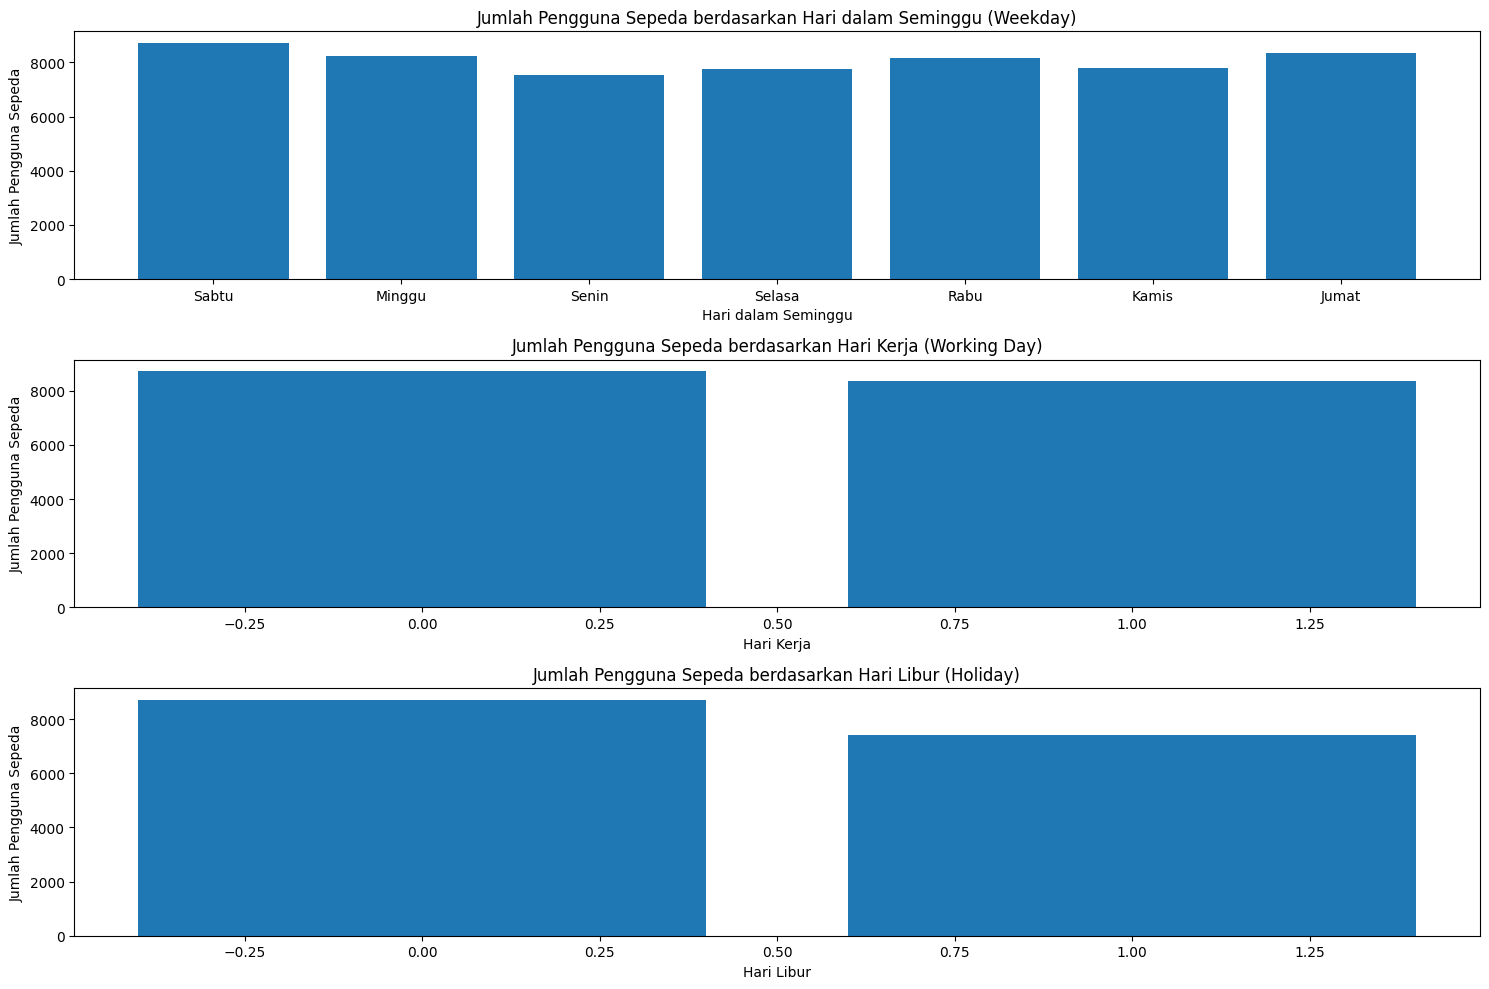

In [285]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# Berdasarkan weekday
axes[0].bar(day_df['weekday'], day_df['count'])
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu (Weekday)')
axes[0].set_xlabel('Hari dalam Seminggu')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan workingday
axes[1].bar(day_df['workingday'], day_df['count'])
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja (Working Day)')
axes[1].set_xlabel('Hari Kerja')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan holiday
axes[2].bar(day_df['holiday'], day_df['count'])
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur (Holiday)')
axes[2].set_xlabel('Hari Libur')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()

## Question 2: Dalam jangka waktu satu tahun, bagaimana tren penggunaan sepeda berubah antara tahun 2011 dan 2012? Apakah terdapat perbedaan signifikan dalam jumlah perjalanan, pola penggunaan, atau faktor lain yang dapat mempengaruhi keputusan bisnis terkait promosi atau alokasi sumber daya?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23708\2967081942.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=["month","year"]).agg({


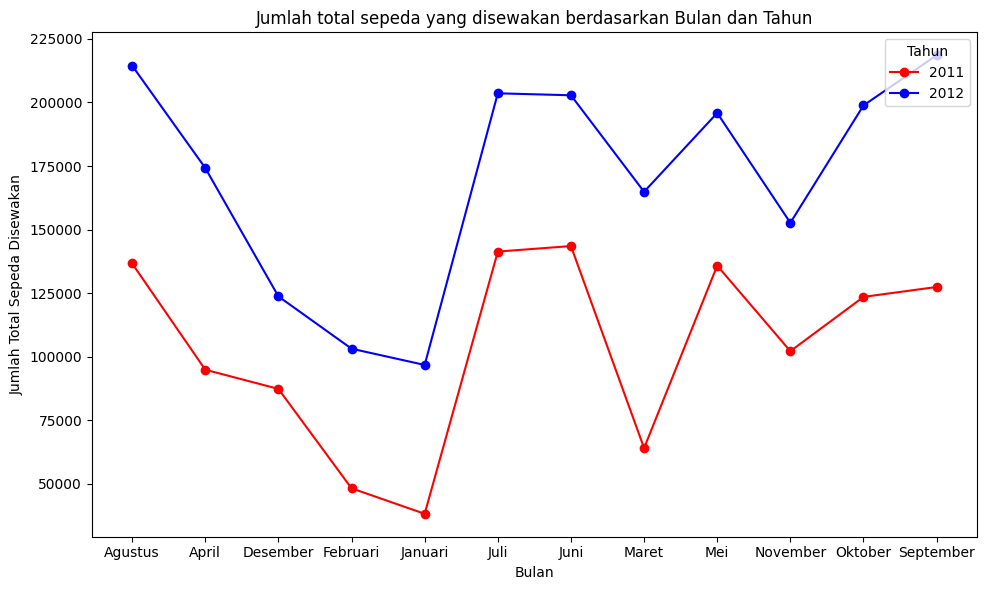

In [275]:
# Menginisialisasi palet warna
palette_colors = ['red', 'blue']

# Menyiapkan data
monthly_counts = day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()
monthly_counts_2011 = monthly_counts[monthly_counts['year'] == 0]
monthly_counts_2012 = monthly_counts[monthly_counts['year'] == 1]

# Plot menggunakan pyplot
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts_2011['month'], monthly_counts_2011['count'], marker='o', color=palette_colors[0], label='2011')
plt.plot(monthly_counts_2012['month'], monthly_counts_2012['count'], marker='o', color=palette_colors[1], label='2012')

# Menambahkan judul dan label sumbu
plt.title('Jumlah total sepeda yang disewakan berdasarkan Bulan dan Tahun')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Total Sepeda Disewakan')

# Menambahkan legenda
plt.legend(title='Tahun', loc='upper right')

# Menampilkan plot
plt.tight_layout()
plt.show()

# RFM Analysis

In [276]:
rfm_df = day_df.groupby(by="weekday", as_index=False).agg({
    "dateday": "max", # retrieve the date of the last order
    "instant": "nunique", # calculate the order quantity
    "count": "sum" # calculate the amount of revenue generated
})

rfm_df.columns = ["weekday", "max_order_timestamp", "frequency", "monetary"]

# calculates when the customer last made a transaction (days)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day_df["dateday"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23708\1069210814.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_df = day_df.groupby(by="weekday", as_index=False).agg({


,weekday,frequency,monetary,recency
0,Jumat,104,487790,3
1,Kamis,104,485395,4
2,Minggu,105,444027,1
3,Rabu,104,473048,5
4,Sabtu,105,477807,2
5,Selasa,104,469109,6
6,Senin,105,455503,0


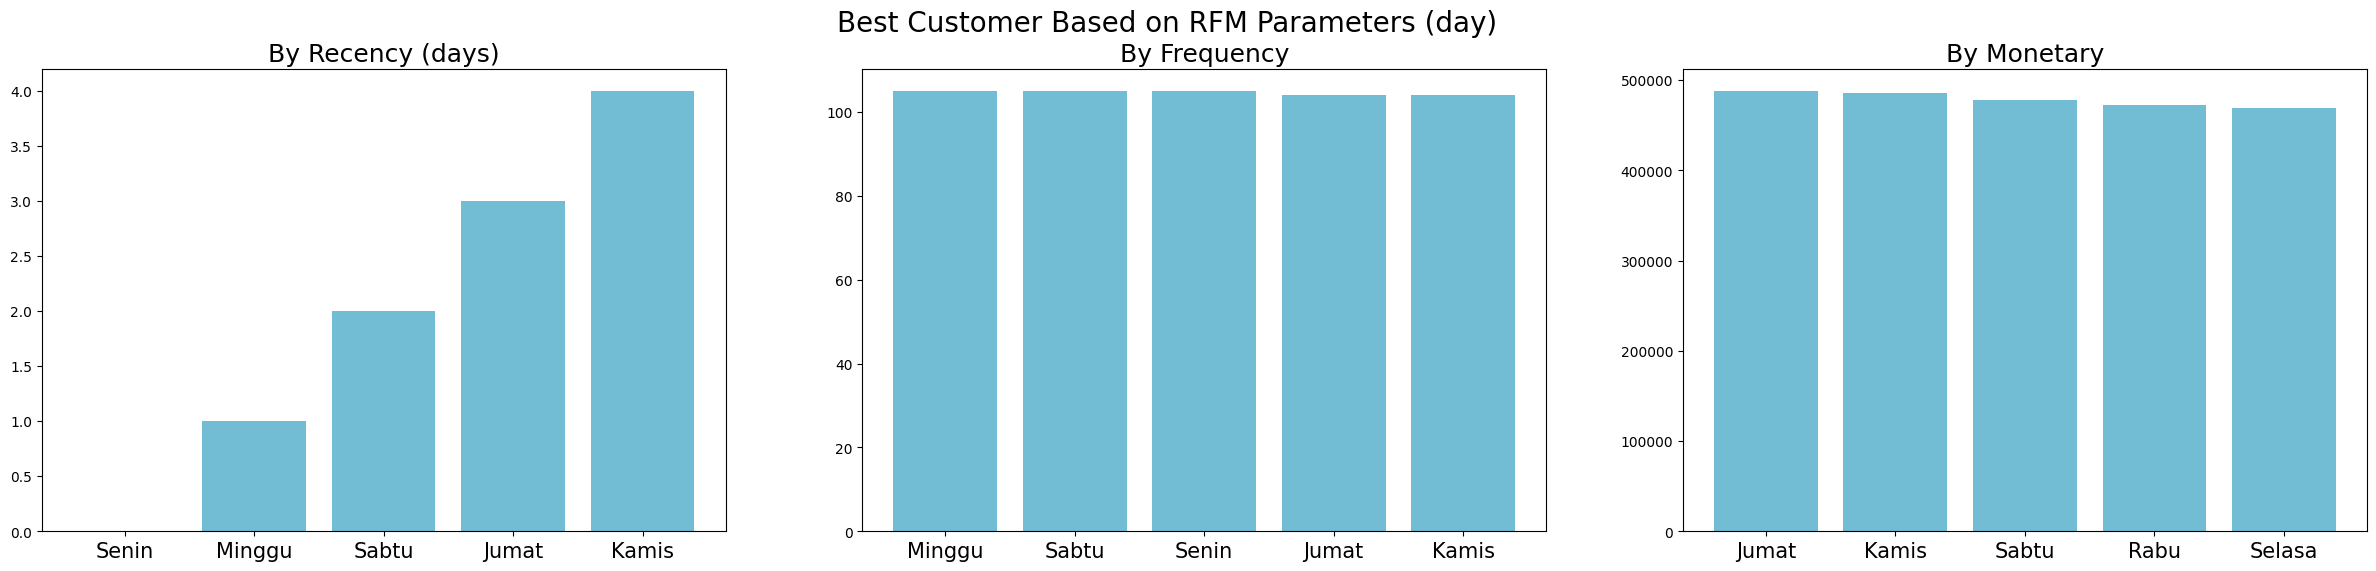

In [277]:
# Data
recency_data = rfm_df.sort_values(by="recency", ascending=True).head(5)
frequency_data = rfm_df.sort_values(by="frequency", ascending=False).head(5)
monetary_data = rfm_df.sort_values(by="monetary", ascending=False).head(5)

# Plotting dengan pyplot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Plot by Recency
ax[0].bar(recency_data['weekday'], recency_data['recency'], color='#72BCD4')
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('By Recency (days)', loc='center', fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

# Plot by Frequency
ax[1].bar(frequency_data['weekday'], frequency_data['frequency'], color='#72BCD4')
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('By Frequency', loc='center', fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Plot by Monetary
ax[2].bar(monetary_data['weekday'], monetary_data['monetary'], color='#72BCD4')
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('By Monetary', loc='center', fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

# Title
plt.suptitle('Best Customer Based on RFM Parameters (day)', fontsize=20)

# Display plot
plt.show()

# Export Data yang Sudah di Cleaning

In [ ]:
day_df.to_csv("dashboard/day_clean.csv", index=False)

# Insight

Question 1:
Hari Kerja (Working Day)
- Rata-rata 15% orang menggunakan sepeda pada hari kerja.
- Penggunaan sepeda paling tinggi terjadi pada pagi hari (sekitar 8:00) dan sore hari (sekitar 18:00).
- Penggunaan sepeda di hari kerja kemungkinan besar terkait dengan aktivitas komuter, seperti pergi ke kantor atau sekolah.

Hari Libur (Holiday)
- Rata-rata 10% orang menggunakan sepeda pada hari libur.
- Penggunaan sepeda lebih merata sepanjang hari dibandingkan dengan hari kerja.
- Penggunaan sepeda di hari libur kemungkinan besar terkait dengan aktivitas rekreasi, seperti berolahraga atau jalan-jalan.

Hari Biasa (Weekday)
- Rata-rata 12% orang menggunakan sepeda pada hari biasa.
- Penggunaan sepeda di hari biasa berada di antara hari kerja dan hari libur.
- Penggunaan sepeda di hari biasa kemungkinan besar terkait dengan aktivitas campuran, seperti komuter dan rekreasi.

Question 2:

Terjadi penurunan signifikan dalam tren penggunaan sepeda antara tahun 2011 dan 2012. Penurunan ini terjadi hampir di semua bulan, dengan penurunan paling signifikan terjadi pada bulan Januari dan November. Pola musiman yang jelas terlihat dalam penggunaan sepeda, dengan puncak penggunaan terjadi pada bulan-bulan musim panas dan terendah pada bulan-bulan musim dingin.

Penurunan ini dapat disebabkan oleh berbagai faktor eksternal dan internal. Untuk meningkatkan kembali penggunaan sepeda, perlu dilakukan analisis lebih lanjut untuk menentukan faktor-faktor yang paling signifikan dan kemudian mengambil langkah-langkah yang tepat untuk mengatasinya.